In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

# Plotting Functions

In [2]:
# def visualize_rates(data, fpr=True, category='Accent', model_name='Res-TSSDNet'):
#     # Determine the value name based on the fpr flag:
#     value_name = 'FPR' if fpr else 'TNR'

#     # Reshape the data for plotting:
#     df_melted = data.melt(
#         id_vars=[category],
#         value_vars=['Baseline', 'Fine-Tuned'],
#         var_name='Evaluation Results',
#         value_name=value_name
#     )

#     # Match colors to our presentation (but feel free to change):
#     # custom_palette = {
#     #     'Baseline': '#3a9593ff',
#     #     'Fine-Tuned': '#d9534fff'
#     # }
#     custom_palette = sns.color_palette("Set2", 2) # More color-blind friendly.
#     sns.set_style("darkgrid")

#     # Create the bar plot:
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x=category,
#                 y=value_name,
#                 hue='Evaluation Results',
#                 data=df_melted,
#                 palette=custom_palette,
#                 width=0.8)

#     # Set plot title and labels:
#     metric = "False Positive Rate" if fpr else "True Negative Rate"
#     plot_title = f'{model_name} {metric} By {category}'
#     plt.title(plot_title)
#     plt.xlabel(category)
#     plt.xticks(rotation=90)
#     plt.ylabel(metric)
#     plt.legend(title='Evaluation Results', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside of plots.

#     # Display the plot
#     plt.show()

# Res-TSSDNet Visualizations

In [16]:
accent_categories = [
    'British Isles',
    'Caribbean',
    'East Asia',
    'Middle East and Central Asia',
    'North America', 
    'South Asia',
    'Southeast Asia', 
    'Sub-Saharan Africa',
    'Western Europe and South America'
]

,Accent,Baseline,Fine-Tuned
0,British Isles,0.98,0.79
1,Caribbean,0.88,0.94
2,East Asia,0.88,0.96
3,Middle East and Central Asia,0.83,0.96
4,North America,0.93,0.70


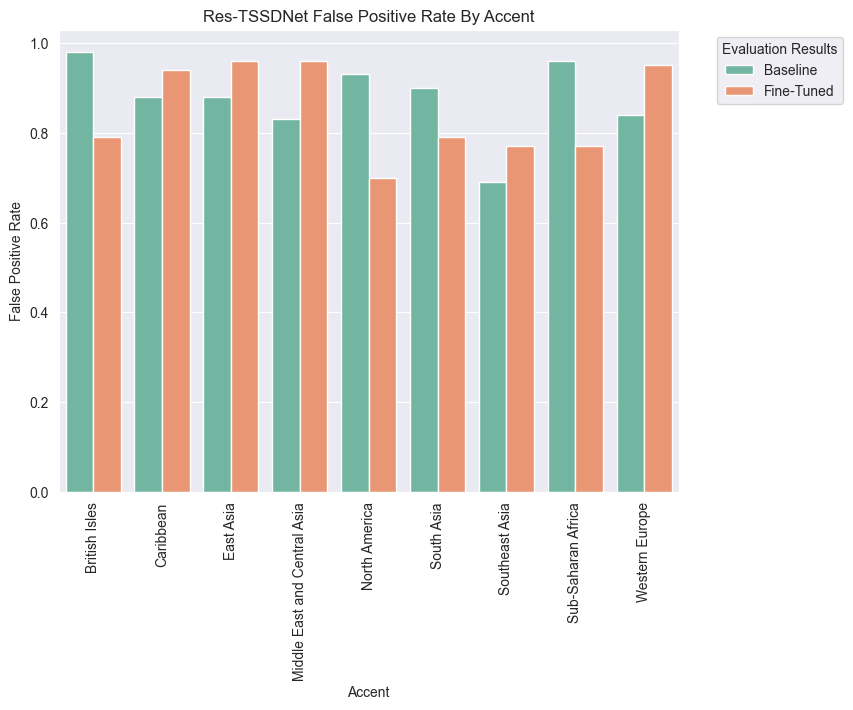

In [17]:
# Accent FPRs
accent_fpr_data = {
    'Accent': accent_categories,
    'Baseline': [0.98, 0.88, 0.88, 0.83, 0.93, 0.90, 0.69, 0.96, 0.84],
    'Fine-Tuned': [0.79, 0.94, 0.96, 0.96, 0.70, 0.79, 0.77, 0.77, 0.95]
}
accent_fpr_data = pd.DataFrame(accent_fpr_data)
display(accent_fpr_data.head(5))
visualize_rates(data=accent_fpr_data,
                fpr=True,
                category='Accent',
                model_name='Res-TSSDNet')

,Accent,Baseline,Fine-Tuned
0,British Isles,0.02,0.21
1,Caribbean,0.12,0.06
2,East Asia,0.12,0.04
3,Middle East and Central Asia,0.16,0.03
4,North America,0.07,0.30


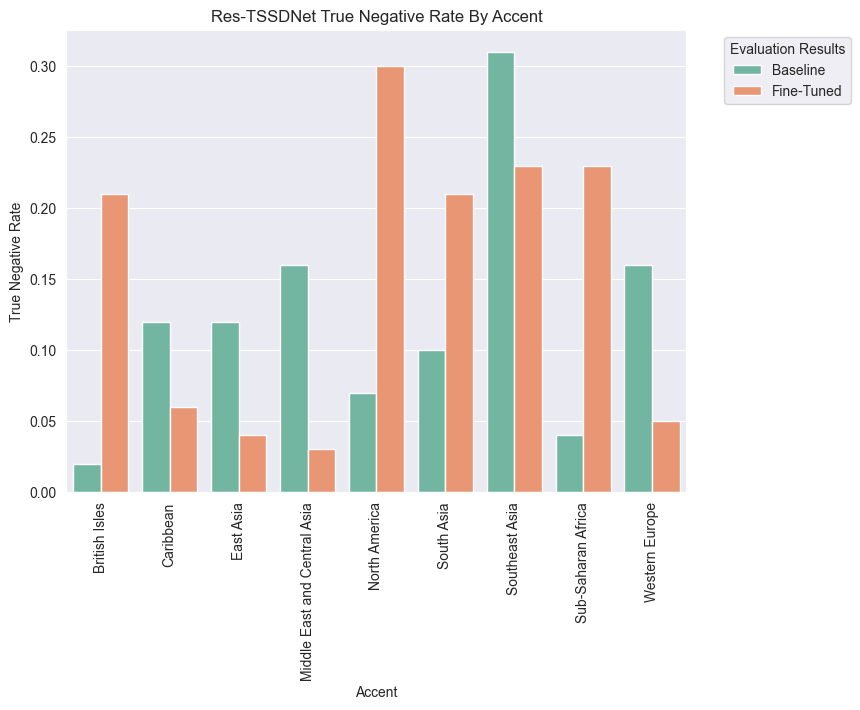

In [18]:
# Accent TNRs
accent_tnr_data = {
    'Accent': accent_categories,
    'Baseline': [0.02, 0.12, 0.12, 0.16, 0.07, 0.10, 0.31, 0.04, 0.16],
    'Fine-Tuned': [0.21, 0.06, 0.04, 0.03, 0.30, 0.21, 0.23, 0.23, 0.05]
}
accent_tnr_data = pd.DataFrame(accent_tnr_data)
display(accent_tnr_data.head(5))
visualize_rates(data=accent_tnr_data,
                fpr=False,
                category='Accent',
                model_name='Res-TSSDNet')

,Gender,Baseline,Fine-Tuned
0,Female,0.798206,0.818386
1,Male,0.957399,0.876682


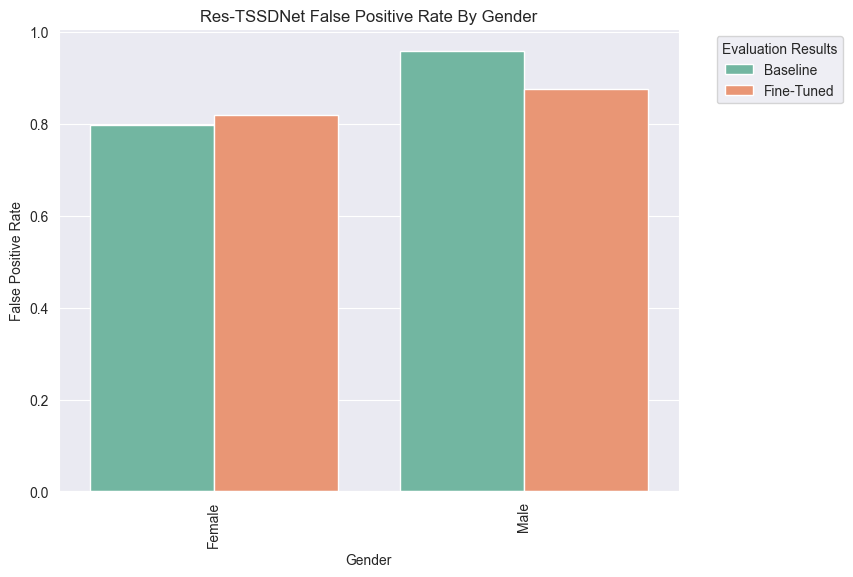

In [20]:
# # Gender FPRs
gender_fpr_data = {
    'Gender': ['Female', 'Male'],
    'Baseline': [0.798206, 0.957399],
    'Fine-Tuned': [0.818386, 0.876682]
}
gender_fpr_data = pd.DataFrame(gender_fpr_data)
display(gender_fpr_data.head(5))
visualize_rates(data=gender_fpr_data,
                fpr=True,
                category='Gender',
                model_name='Res-TSSDNet')

,Gender,Baseline,Fine-Tuned
0,Female,0.201794,0.181614
1,Male,0.042601,0.123318


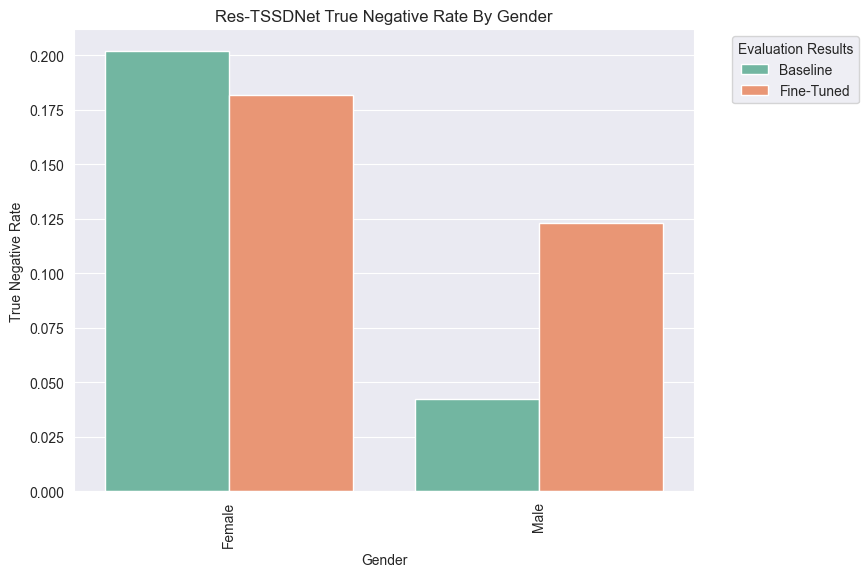

In [19]:
# # Gender TNRs
gender_tnr_data = {
    'Gender': ['Female', 'Male'],
    'Baseline': [0.201794, 0.042601],
    'Fine-Tuned': [0.181614, 0.123318]
}
gender_tnr_data = pd.DataFrame(gender_tnr_data)
display(gender_tnr_data.head(5))
visualize_rates(data=gender_tnr_data,
                fpr=False,
                category='Gender',
                model_name='Res-TSSDNet')

# Testing Additional Variations

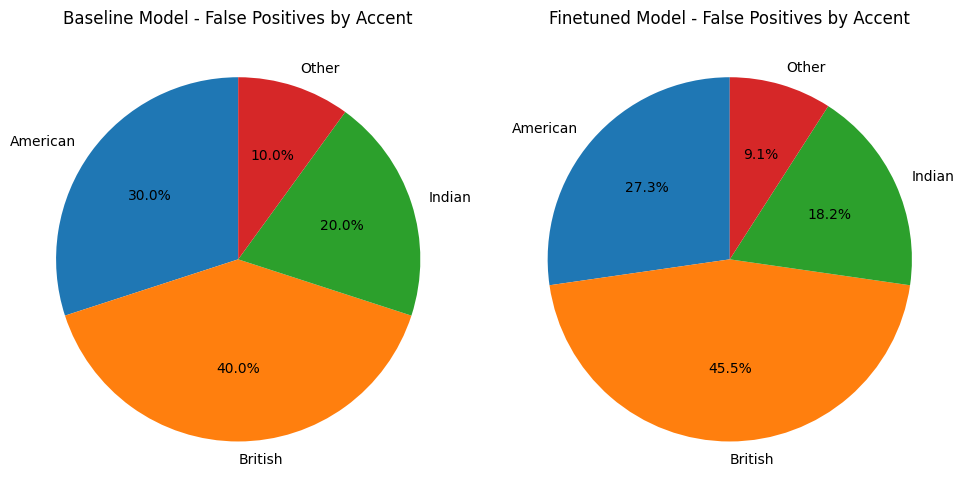

In [3]:
# OF ALL THE FPs, HOW MANY ARE IN EACH ACCENT GROUP
# AND OVERALL "ACCURACY" METRIC

import matplotlib.pyplot as plt

# Example data for false positives by accent category
# Replace these values with your actual data for false positives in each accent category
accents = ['American', 'British', 'Indian', 'Other']  # Example accent categories
baseline_fp_values = [30, 40, 20, 10]  # Example baseline FP values for each accent
finetuned_fp_values = [15, 25, 10, 5]  # Example finetuned FP values for each accent

# Create a figure with two subplots for baseline and finetuned pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot baseline pie chart (False Positives by accent)
axes[0].pie(baseline_fp_values, labels=accents, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Baseline Model - False Positives by Accent')

# Plot finetuned pie chart (False Positives by accent)
axes[1].pie(finetuned_fp_values, labels=accents, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Finetuned Model - False Positives by Accent')

# Display the pie charts
plt.tight_layout()
plt.show()


In [3]:
THRESHOLD = 0.5364887 

In [4]:
def clean_accent_name(accent):
    accent = accent.split("(")[0].strip()
    accent = " ".join([word.capitalize() for word in accent.split()])
    accent = accent.replace("&", "and")
    if accent == "Western Europe":
        return "Western Europe and South America"
    return accent

def clean_gender_name(gender):
    return gender.split("_")[0]

def preprocess_results(results_df):
    results_df["region"] = results_df["region"].apply(clean_accent_name)
    results_df["gender"] = results_df["gender"].apply(clean_gender_name)
    results_df["predicted_spoof"] = (results_df["spoof_score"] > THRESHOLD).astype(int) # results["prediction_score"]
    results_df["actual_label"] = 1
    results_df["FP"] = (results_df["predicted_spoof"] == 1) & (results_df["actual_label"] == 1)
    results_df["TN"] = (results_df["predicted_spoof"] == 0) & (results_df["actual_label"] == 1)
    return results_df

def compute_region_metrics(results_df, model_name):
    region_metrics = results_df.groupby("region").agg(
        total_samples=("actual_label", "count"),
        false_positives=("FP", "sum"),
        true_negatives=("TN", "sum")
    )
    region_metrics["FPR"] = region_metrics["false_positives"] / region_metrics["total_samples"]
    region_metrics["TNR"] = region_metrics["true_negatives"] / region_metrics["total_samples"]
    region_metrics = region_metrics.reset_index()
    region_metrics["Model"] = model_name
    region_metrics = region_metrics.sort_values(by="region", ascending=True)
    return region_metrics

In [5]:
tssd_baseline = pd.read_csv("baseline-updated-results/final-results-tssd.csv")
tssd_baseline = preprocess_results(tssd_baseline)
tssd_baseline = tssd_baseline[~tssd_baseline["region"].isin(["Caribbean"])]
tssd_finetune_2 = pd.read_csv("finetune-2/final-results-tssd.csv")
tssd_finetune_2 = preprocess_results(tssd_finetune_2)
tssd_finetune_2 = tssd_finetune_2[~tssd_finetune_2["region"].isin(["Caribbean"])]

In [6]:
region_metrics_baseline = compute_region_metrics(tssd_baseline, "Baseline")
region_metrics_finetune = compute_region_metrics(tssd_finetune_2, "Fine-tuned")

In [7]:
region_metrics_baseline

,region,total_samples,false_positives,true_negatives,FPR,TNR,Model
0,British Isles,100,93,7,0.930000,0.070000,Baseline
1,East Asia,100,87,13,0.870000,0.130000,Baseline
2,Middle East and Central Asia,92,75,17,0.815217,0.184783,Baseline
3,North America,100,89,11,0.890000,0.110000,Baseline
4,South Asia,100,89,11,0.890000,0.110000,Baseline
5,Southeast Asia,100,69,31,0.690000,0.310000,Baseline
6,Sub-saharan Africa,100,94,6,0.940000,0.060000,Baseline
7,Western Europe and South America,100,84,16,0.840000,0.160000,Baseline


In [8]:
mean_value = region_metrics_baseline['FPR'].mean()
absolute_diffs = abs(region_metrics_baseline['FPR'] - mean_value)
avg_absolute_diff = absolute_diffs.mean()
print("Average Absolute Difference from Mean:", avg_absolute_diff)

Average Absolute Difference from Mean: 0.05730978260869565


In [9]:
mean_value = region_metrics_finetune['FPR'].mean()
absolute_diffs = abs(region_metrics_finetune['FPR'] - mean_value)
avg_absolute_diff = absolute_diffs.mean()
print("Average Absolute Difference from Mean:", avg_absolute_diff)

Average Absolute Difference from Mean: 0.009891304347826086


In [10]:
region_metrics_combined = pd.concat(
    [region_metrics_baseline, region_metrics_finetune],
    ignore_index=True
)

In [11]:
# === Function to calculate confidence intervals for proportions using Wilson Score Interval ===
def compute_confidence_interval(proportion, total, confidence=0.95):
    """Compute the confidence interval for a proportion using the Wilson Score Interval."""
    if total == 0:
        return (0, 0)
    z = stats.norm.ppf((1 + confidence) / 2)  # Z-score for confidence level
    p = proportion
    n = total
    center = (p + (z**2) / (2 * n)) / (1 + (z**2) / n)
    margin = (z * np.sqrt((p * (1 - p) / n) + (z**2) / (4 * n**2))) / (1 + (z**2) / n)
    return center - margin, center + margin

# === Function to apply CI computation for both FPR & TNR ===
def apply_confidence_intervals(df):
    df["FPR_CI_Lower"], df["FPR_CI_Upper"] = zip(*df.apply(
        lambda row: compute_confidence_interval(row["FPR"], row["total_samples"]),
        axis=1
    ))
    df["TNR_CI_Lower"], df["TNR_CI_Upper"] = zip(*df.apply(
        lambda row: compute_confidence_interval(row["TNR"], row["total_samples"]),
        axis=1
    ))
    return df

# === Apply confidence interval calculation to all models ===
all_region_metrics = [region_metrics_baseline, region_metrics_finetune]

for i, df in enumerate(all_region_metrics):
    all_region_metrics[i] = apply_confidence_intervals(df)

region_metrics_baseline, region_metrics_finetune = all_region_metrics

# === Combine all models into a single DataFrame ===
combined_fpr = pd.concat([
    region_metrics_baseline[["region", "FPR", "FPR_CI_Lower", "FPR_CI_Upper", "Model"]],
    region_metrics_finetune[["region", "FPR", "FPR_CI_Lower", "FPR_CI_Upper", "Model"]]
], ignore_index=True)

combined_tnr = pd.concat([
    region_metrics_baseline[["region", "TNR", "TNR_CI_Lower", "TNR_CI_Upper", "Model"]],
    region_metrics_finetune[["region", "TNR", "TNR_CI_Lower", "TNR_CI_Upper", "Model"]]
], ignore_index=True)

# === Print confirmation ===
print("Confidence intervals applied and all models successfully combined!")

Confidence intervals applied and all models successfully combined!


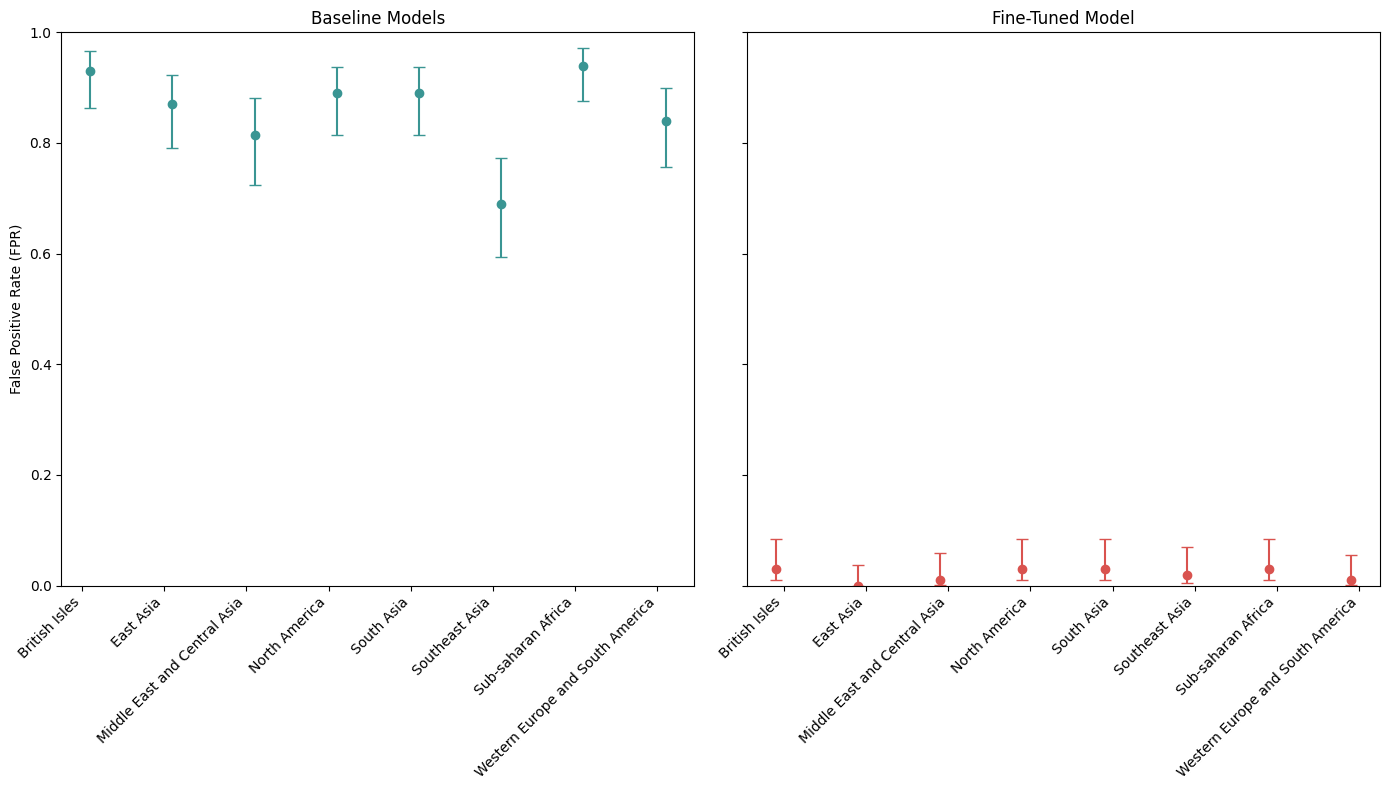

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a horizontal layout: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

offset = 0.1  # Horizontal offset to visually separate overlapping points

# === Custom palette ===
model_colors = {
    "Baseline": "#3a9593",       # Teal
    "Fine-tuned": "#d9534f",     # Coral Red
}

model_offsets = {
    "Baseline": offset,
    "Fine-tuned": -offset,
}

# Get consistent list of regions for axis labels
regions = sorted(combined_fpr["region"].unique())
region_to_index = {region: idx for idx, region in enumerate(regions)}

# === Left Plot: Baseline Models ===
for model in ["Baseline"]:
    subset = combined_fpr[combined_fpr["Model"] == model]
    x_positions = [region_to_index[r] + model_offsets[model] for r in subset["region"]]
    y = subset["FPR"]
    yerr_lower = (y - subset["FPR_CI_Lower"]).clip(lower=0)
    yerr_upper = (subset["FPR_CI_Upper"] - y).clip(lower=0)
    axes[0].errorbar(x_positions, y, 
                     yerr=[yerr_lower, yerr_upper],
                     fmt="o", color=model_colors[model], capsize=4, label=model)

axes[0].set_title("Baseline Models")
axes[0].set_ylabel("False Positive Rate (FPR)")
axes[0].set_ylim(0, 1)

# === Right Plot: Fine-Tuned Models ===
for model in ["Fine-tuned"]:
    subset = combined_fpr[combined_fpr["Model"] == model]
    x_positions = [region_to_index[r] + model_offsets[model] for r in subset["region"]]
    y = subset["FPR"]
    yerr_lower = (y - subset["FPR_CI_Lower"]).clip(lower=0)
    yerr_upper = (subset["FPR_CI_Upper"] - y).clip(lower=0)
    axes[1].errorbar(x_positions, y, 
                     yerr=[yerr_lower, yerr_upper],
                     fmt="o", color=model_colors[model], capsize=4, label=model)

axes[1].set_title("Fine-Tuned Model")
axes[1].set_ylim(0, 1)

# Set shared x-axis labels (region names)
for ax in axes:
    ax.set_xticks(np.arange(len(regions)))
    ax.set_xticklabels(regions, rotation=45, ha="right")

plt.tight_layout()
plt.show()